In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# 训练集有10000个数据，300个特征

## 对训练集进行数据分析
- 样本数10000
- 300维特征
- 数据类型为浮点型 f64
- 最大值为 19左右
- 最小值为 -13左右

In [19]:
df = pd.read_csv("X_train.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.617940,-0.391980,0.13278,0.032551,0.55201,0.83393,-0.837550,-0.874060,0.43930,0.268260,...,-0.45454,0.36452,1.575300,-0.620320,-0.25371,-0.447750,-0.038273,-0.019938,-0.195500,0.428830
1,0.333860,-1.549100,1.67050,0.793560,0.80251,-0.07206,-0.068276,3.302400,0.52045,0.685720,...,-0.36913,1.74080,1.286600,-0.013396,-1.53930,0.833540,0.472610,0.513030,-0.743140,1.219900
2,0.040399,-0.608070,1.62080,-0.355970,0.12105,1.35250,0.373200,1.111700,0.35894,-0.344100,...,-1.40230,-0.24763,0.507050,0.708220,-0.60083,0.911040,0.009979,-0.475990,-0.094731,-0.008521
3,1.723600,0.195290,1.03880,-3.009100,-0.33222,0.91067,0.666690,0.717250,3.05850,1.489900,...,-1.21540,-0.25284,-1.307800,-0.445660,0.27918,0.264670,-0.149360,1.492900,-1.176700,-1.854500
4,-1.032300,1.900100,-1.46010,0.383710,-0.51039,0.74481,-0.914660,-0.865880,-0.34426,0.869650,...,1.32230,0.06020,-1.079000,-0.617050,1.18450,-0.210630,-0.105870,-0.412040,1.409700,0.133350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.821000,-0.016804,0.36978,-1.652500,1.32370,-0.67655,-1.238000,-0.764210,0.16283,-0.240030,...,-1.25470,-0.76602,1.453600,1.954500,0.47550,-1.824700,-0.227030,1.879700,-1.123800,1.309600
9996,-0.636390,-0.403470,0.81521,-0.665990,-2.16210,2.03190,0.278910,0.169180,0.52821,-0.217570,...,0.42273,-0.07438,-0.958710,-0.030666,-0.43114,0.075285,-0.892370,-0.677320,-1.330200,-0.809090
9997,0.773410,0.157330,-0.82969,-2.569100,1.33060,-0.45354,0.154800,0.010011,0.79613,0.606680,...,-1.15410,-1.75520,-1.645100,0.316050,-0.49966,0.997910,-1.389800,0.773250,0.049626,-0.500440
9998,-0.382970,1.011900,-2.12320,1.385600,0.30195,-0.45940,-0.050270,0.591280,1.49210,0.012371,...,0.24839,0.20263,0.010861,-0.775840,-0.98314,0.216800,1.323800,0.450360,1.586200,-0.289050


## 查找特征维度的最大值，最小值
- 每个维度的特征数据尺度不一致，考虑标准化

In [20]:
df.max()

0       4.5750
1       4.2322
2       6.5868
3       3.8679
4       7.7052
        ...   
295     4.6608
296    11.4290
297     3.9451
298     4.2649
299     4.1854
Length: 300, dtype: float64

In [21]:
df.min()

0      -8.1638
1     -11.9820
2      -3.5020
3      -4.7040
4      -7.0178
        ...   
295    -4.4358
296    -3.7089
297    -8.5983
298    -5.6691
299    -5.2105
Length: 300, dtype: float64

## 缺失值检查

In [22]:
counts = df.isnull().sum().sum()
counts

0

并无缺失值 可以忽略缺失值处理|

## 异常值检查

In [24]:
std_sorted = df.std().sort_values(ascending=False)
print("Top 5 most variant features:\n", std_sorted.head())
print("\nTop 5 least variant features:\n", std_sorted.tail())


Top 5 most variant features:
 9      1.034924
290    1.030756
52     1.029986
168    1.028817
294    1.026368
dtype: float64

Top 5 least variant features:
 242    0.966883
33     0.965529
25     0.963037
208    0.962472
55     0.961262
dtype: float64


### 优先考虑方差较小的数据，方差越小特征差异越小

## 分析训练集的label
- 一共有28个类别（1-28）
- 考虑one-hot 编码

In [29]:
y_train = pd.read_csv("y_train.csv")
y_train

,label
0,10
1,5
2,5
3,5
4,5
...,...
9995,19
9996,5
9997,17
9998,24


In [32]:
label_counts = y_train['label'].value_counts().sort_index()
label_counts

label
0       18
1        7
2        7
3       65
4      238
5     4479
6      553
7      103
8      516
9       25
10    1081
11      78
12     457
13      62
14     264
15      26
16       6
17     354
18      60
19     177
20     153
21     269
22       7
23      41
24     385
25     184
26     278
27     107
Name: count, dtype: int64

### 观测样本分布 统计每个种类的样本数量

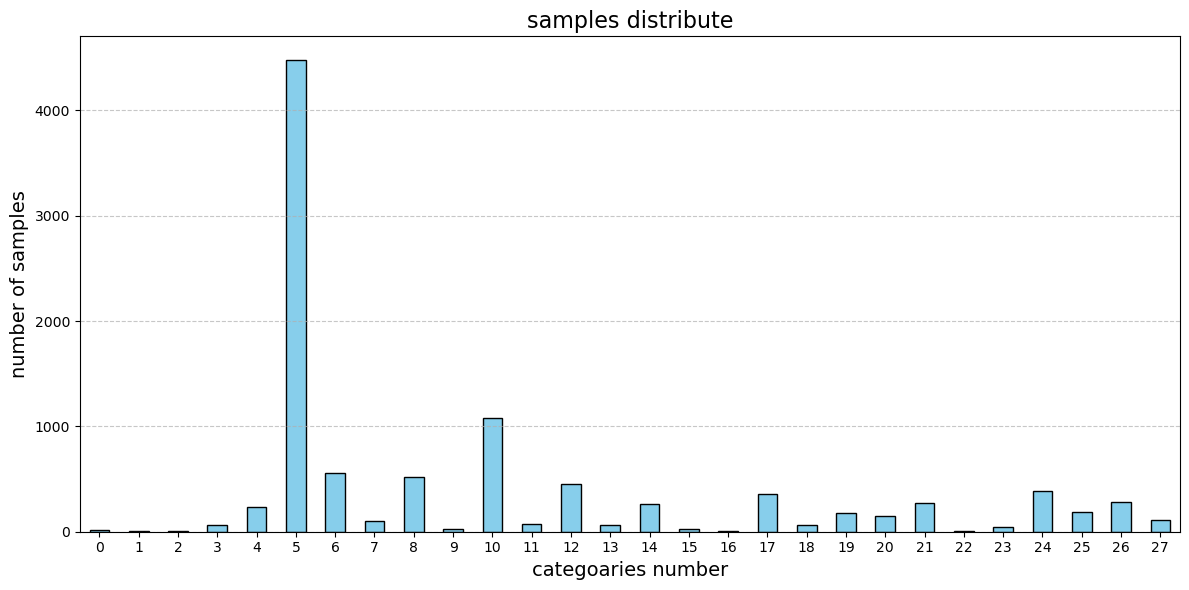

In [35]:
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("samples distribute", fontsize=16)
plt.xlabel("categoaries number", fontsize=14)
plt.ylabel("number of samples", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 存在较为严重的样本不均衡问题 可能的解决办法
- 过采样 SMOTE，ADASYN
- 欠采样 随机下采样多数类
- 使用类别权重加权 class_weight
- 使用 Focal Loss

## 尝试实现任务

In [48]:
X = pd.read_csv("X_train.csv") 
y = pd.read_csv("y_train.csv")['label']

### 划分数据集

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=7
)

### 数据标准化

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 特征选择

In [51]:
selector = SelectKBest(score_func=f_classif, k=50)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

### 处理数据不均衡

In [56]:
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train.values.ravel())

### 模型训练

In [57]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

### 模型预测

In [58]:
y_pred = clf.predict(X_test_selected)

### 模型评估

In [64]:
print("Macro F1-score:", f1_score(y_test, y_pred, average='macro'))
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

Macro F1-score: 0.3097990464664874
Weighted F1-score: 0.6762097914050214


In [63]:
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         4
           1      0.000     0.000     0.000         1
           2      0.000     0.000     0.000         1
           3      0.000     0.000     0.000        13
           4      0.423     0.458     0.440        48
           5      0.890     0.933     0.911       896
           6      0.863     0.910     0.886       111
           7      0.400     0.190     0.258        21
           8      0.554     0.699     0.618       103
           9      0.000     0.000     0.000         5
          10      0.574     0.769     0.657       216
          11      0.526     0.625     0.571        16
          12      0.398     0.495     0.441        91
          13      0.000     0.000     0.000        12
          14      0.200     0.094     0.128        53
          15      0.500     0.200     0.286         5
          16      0.000     0.000     0.000         1
    

D:\Anaconda3\envs\skin_lesion_class\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\skin_lesion_class\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda3\envs\skin_lesion_class\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
